## Perfil de atendimento Médicos nas Unidades Municipais de Saúde de Curitiba

Base de dados do sistema Informatizado "E-saúde". 

Este sistema viabiliza o registro dos atendimentos prestados pela Secretaria Municipal de Saúde de Curitiba em sua rede de atenção. 

Esta rede é composta por Unidades Básicas de Saúde, Unidades de Pronto Atendimento, Centros de Especialidades Médicas e Odontológicas, entre outros. 

Os dados disponibilizados para consulta referem-se ao perfil de atendimento dos profissionais medicos da rede municipal de saúde.

In [ ]:
#In English

## Profile of care Physicians in the Municipal Health Units of Curitiba 

Database of the computerized system "E-saúde".

This system makes it possible to record the services provided by the Municipal Health Department of Curitiba in its care network.

This team is made up of Basic Health Units, Emergency Care Units, Medical and Dental Specialty Centers, among others.

The data available for consultation refer to the care profile of medical professionals in the municipal healthcare.

In [1]:
#DataSet disponível em: https://www.curitiba.pr.gov.br/dadosabertos
#Feito Upload no Kaggle: 

In [2]:
import datetime as dt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

# Formatação de 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

# Para mostrar todas as colunas ao dar um 'head'
pd.set_option('display.max_columns', 100)

sns.set()

In [3]:
# Importando arquivo

df = pd.read_csv(
    '2022-10-06_Sistema_E-Saude_Medicos_-_Base_de_Dados.csv',
    sep = ';', 
    parse_dates = True,
    encoding = 'ISO-8859-1', 
    low_memory = False
) 

In [20]:
#Análise Exploratória

# 1) Visualização Geral
df.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,Descrição do CBO,Código do CID,Descrição do CID,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Município,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional,Idade,Classificação Etária
0,2022-03-01 00:25:49,2010-05-13,F,2,UPA,2639548,UPA CAMPO COMPRIDO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,MEDICO CLINICO,B972,"CORONAVIRUS, COMO CAUSA DE DOENCAS CLASSIFICAD...",Nao,2,0,1,Nao,NaN,Nao,NaT,NaN,NaN,NaN,FILTRACAO,OUTROS,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,OUTROS,OUTROS,5.00,OUTROS,OUTROS,OUTROS,OUTROS,CURITIBA,CRISTO REI,Brasileira,7941333,1,1,93853,11,Criança
1,2022-03-01 02:14:19,2021-06-25,M,2,UPA,2639548,UPA CAMPO COMPRIDO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,MEDICO CLINICO,R509,FEBRE NAO ESPECIFICADA,Nao,"1,4",0,0,Nao,NaN,Nao,NaT,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.00,"UNIDADE DE SAUDE,HOSPITAL",NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CIDADE INDUSTRIAL,Brasileira,11127812,1,1,93853,0,Criança
2,2022-03-01 02:57:48,2019-08-28,M,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225170,MEDICO GENERALISTA,H669,OTITE MEDIA NAO ESPECIFICADA,Sim,3,0,0,Nao,NaN,Nao,NaT,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.00,UNIDADE DE SAUDE,NAO PARTICIPA,OUTROS,OUTROS,CURITIBA,ABRANCHES,Brasileira,10354061,1,1,107433,2,Criança
3,2022-03-01 00:58:04,2020-06-07,M,2,UPA,3827836,UPA PINHEIRINHO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,MEDICO CLINICO,J029,FARINGITE AGUDA NAO ESPECIFICADA,Nao,0,0,0,Nao,NaN,Nao,NaT,NaN,NaN,NaN,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,4.00,HOSPITAL,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,CIDADE INDUSTRIAL,Brasileira,10661286,1,2,112409,1,Criança
4,2022-03-01 01:23:03,1952-05-25,M,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,MEDICO CLINICO,N390,INFECCAO DO TRATO URINARIO DE LOCALIZACAO NAO ...,Sim,24,0,0,Nao,NaN,Nao,NaT,NaN,NaN,NaN,SEM TRATAMENTO,OUTROS,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.00,UNIDADE DE SAUDE,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAPAO DA IMBUIA,Brasileira,5072566,1,1,98666,69,Idoso


In [6]:
# 2) Tamanho do dataset
print(df.shape[0],'linhas e',df.shape[1],'colunas')

1039649 linhas e 42 colunas


In [7]:
# 3) Infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039649 entries, 0 to 1039648
Data columns (total 42 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   Data do Atendimento                           1039649 non-null  object 
 1   Data de Nascimento                            1039649 non-null  object 
 2   Sexo                                          1039649 non-null  object 
 3   Código do Tipo de Unidade                     1039649 non-null  int64  
 4   Tipo de Unidade                               1039649 non-null  object 
 5   Código da Unidade                             1039649 non-null  int64  
 6   Descrição da Unidade                          1039649 non-null  object 
 7   Código do Procedimento                        1039649 non-null  int64  
 8   Descrição do Procedimento                     1039649 non-null  object 
 9   Código do CBO                      

In [8]:
#Convertendo Datas para Datetime
df['Data do Atendimento']  = pd.to_datetime(df['Data do Atendimento'], format='%d/%m/%Y %H:%M:%S')
df['Data de Nascimento']   = pd.to_datetime(df['Data de Nascimento'], format='%d/%m/%Y %H:%M:%S')
df['Data do Internamento'] = pd.to_datetime(df['Data do Internamento'], format='%d/%m/%Y %H:%M:%S')

In [9]:
#Intervalo do DataSet
dataInicial = df['Data do Atendimento'].min().date()
dataFinal = df['Data do Atendimento'].max().date()
print('Atendimentos entre',dataInicial.strftime('%d/%m/%Y'), 'e', dataFinal.strftime('%d/%m/%Y'))
print('Tamanho do intervalo:', (dataFinal-dataInicial).days,'dias')

Atendimentos entre 01/03/2022 e 01/06/2022
Tamanho do intervalo: 92 dias


In [10]:
df = df.rename(columns={'Municício': 'Município'})

In [12]:
#Criando novas colunas
df['Idade'] = (df['Data do Atendimento'] - df['Data de Nascimento']).dt.days / 365
df['Idade'] = df['Idade'].astype(int)

def classificacao_etaria(idade):
    if idade < 12:
        return 'Criança'
    elif idade < 18:
        return 'Adolescente'
    elif idade < 65:
        return 'Adulto'
    else:
        return 'Idoso'
    
df['Classificação Etária'] = df['Idade'].apply(classificacao_etaria)

In [27]:
#Qual o TOTAL DE ATENDIMENTOS por dia por UNIDADE?
df_atendimentos_por_dia = df.groupby([df['Data do Atendimento'].dt.date, df['Tipo de Unidade']]).size().reset_index(name="Total Atendimentos")

In [28]:
# Convertendo de long-format para wide-format para plotagem da série temporal
df_atendimentos_por_dia_wide = df_atendimentos_por_dia.pivot(index='Data do Atendimento', columns='Tipo de Unidade', values='Total Atendimentos')

# Substituindo 'nan' por 0
df_atendimentos_por_dia_wide = df_atendimentos_por_dia_wide.fillna(0)

In [29]:
df_atendimentos_por_dia_wide.head()

Tipo de Unidade,BASICO,SIACE,UPA
Data do Atendimento,,,
2022-03-01,6127.00,310.00,2142.00
2022-03-02,8331.00,378.00,2345.00
2022-03-03,10861.00,561.00,2406.00
2022-03-04,10292.00,477.00,2202.00
2022-03-05,0.00,8.00,2210.00


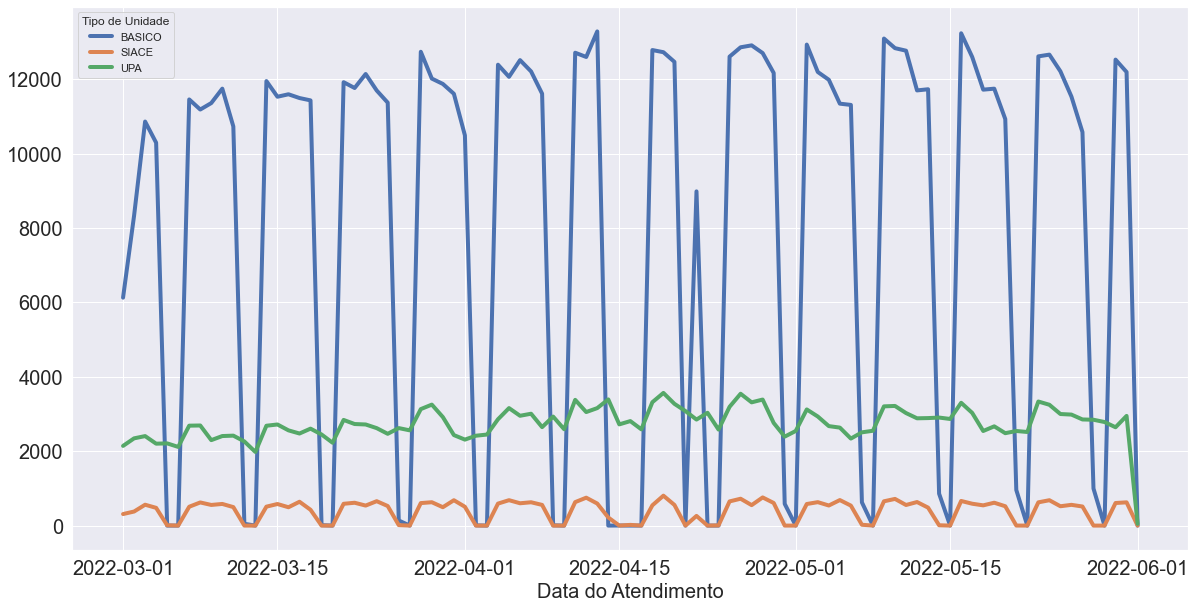

In [30]:
df_atendimentos_por_dia_wide.plot(figsize=(20,10), fontsize=20, linewidth=4)
plt.xlabel('Data do Atendimento', fontsize=20);

C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Solicitação de Exames?'}, xlabel='Solicitação de Exames', ylabel='count'>

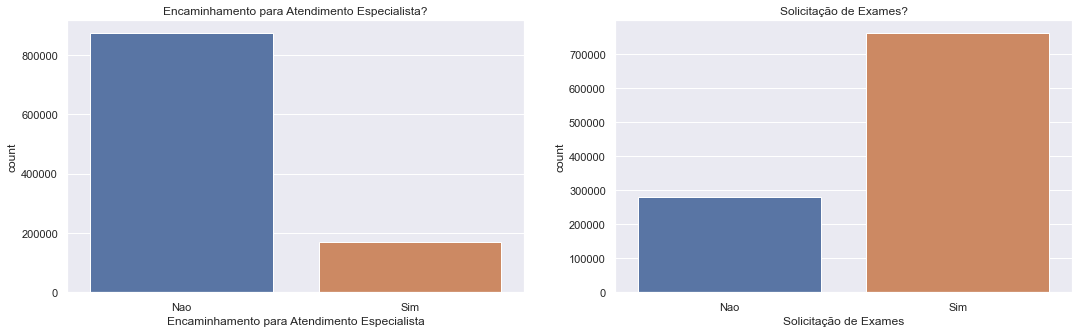

In [31]:
#Qual a proporção de Atendimentos encaminhados para Especialistas e com Solicitação de Exames?

f,ax=plt.subplots(1,2,figsize=(18,5))

# Todos
ax[0].set_title('Encaminhamento para Atendimento Especialista?')
sns.countplot(df['Encaminhamento para Atendimento Especialista'], ax=ax[0])

# Internados
ax[1].set_title('Solicitação de Exames?')
sns.countplot(df['Solicitação de Exames'], ax=ax[1])

In [46]:
#Quais CIDs geram mais atendimentos?
df['Descrição do CID'].value_counts().reset_index(name='Atendimentos').head(10)

,index,Atendimentos
0,EXAME MEDICO GERAL,145609
1,EMISSAO DE PRESCRICAO DE REPETICAO,58449
2,DIAGNOSTICO CLINICO OU EPIDEMIOLOGICO COVID-19...,41535
3,EXAME DE ROTINA DE SAUDE DA CRIANCA,33331
4,HIPERTENSAO ESSENCIAL (PRIMARIA),31942
5,INFECCAO AGUDA DAS VIAS AEREAS SUPERIORES NAO ...,26045
6,PROCEDIMENTO NAO REALIZADO DEVIDO A DECISAO DO...,25058
7,NASOFARINGITE AGUDA [RESFRIADO COMUM],20850
8,DIARREIA E GASTROENTERITE DE ORIGEM INFECCIOSA...,18926
9,DOR LOMBAR BAIXA,15421


In [48]:
#Quais CIDS geram mais internações?
df['Descrição do CID'].value_counts().reset_index(name='Internações').head(10)

,index,Internações
0,EXAME MEDICO GERAL,145609
1,EMISSAO DE PRESCRICAO DE REPETICAO,58449
2,DIAGNOSTICO CLINICO OU EPIDEMIOLOGICO COVID-19...,41535
3,EXAME DE ROTINA DE SAUDE DA CRIANCA,33331
4,HIPERTENSAO ESSENCIAL (PRIMARIA),31942
5,INFECCAO AGUDA DAS VIAS AEREAS SUPERIORES NAO ...,26045
6,PROCEDIMENTO NAO REALIZADO DEVIDO A DECISAO DO...,25058
7,NASOFARINGITE AGUDA [RESFRIADO COMUM],20850
8,DIARREIA E GASTROENTERITE DE ORIGEM INFECCIOSA...,18926
9,DOR LOMBAR BAIXA,15421
